# Merge crude oil prices to price, generation and load data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('./data/price_load_gen.csv')

In [3]:
df.drop(columns = 'Unnamed: 0', inplace = True)

# Import crude oil prices and clean the data
- The prices are from: https://www.eia.gov/dnav/pet/pet_pri_spt_s1_d.htm

In [4]:
xls = pd.ExcelFile('./data/PET_PRI_SPT_S1_D.xls')

In [5]:
xls

In [6]:
crude_oil = pd.read_excel(xls, sheet_name = 'Data 1')

In [7]:
crude_oil.head()

,Back to Contents,Data 1: Crude Oil,Unnamed: 2
0,Sourcekey,RWTC,RBRTE
1,Date,"Cushing, OK WTI Spot Price FOB (Dollars per Ba...",Europe Brent Spot Price FOB (Dollars per Barrel)
2,1986-01-02 00:00:00,25.56,NaN
3,1986-01-03 00:00:00,26,NaN
4,1986-01-06 00:00:00,26.53,NaN


In [8]:
crude_oil.drop(columns = 'Unnamed: 2', inplace = True)

In [9]:
crude_oil = crude_oil.loc[2:,]

In [10]:
crude_oil.head()

,Back to Contents,Data 1: Crude Oil
2,1986-01-02 00:00:00,25.56
3,1986-01-03 00:00:00,26
4,1986-01-06 00:00:00,26.53
5,1986-01-07 00:00:00,25.85
6,1986-01-08 00:00:00,25.87


In [11]:
crude_oil.rename(columns = {'Back to Contents': 'date', 'Data 1: Crude Oil': 'price_per_barrel_dollars'}, inplace=True)

In [12]:
crude_oil.head()

,date,price_per_barrel_dollars
2,1986-01-02 00:00:00,25.56
3,1986-01-03 00:00:00,26
4,1986-01-06 00:00:00,26.53
5,1986-01-07 00:00:00,25.85
6,1986-01-08 00:00:00,25.87


In [13]:
crude_oil.dtypes

date                        object
price_per_barrel_dollars    object
dtype: object

In [14]:
crude_oil['date'] = pd.to_datetime(crude_oil.date, format='%Y-%m%-%d %H:%M')

In [15]:
crude_oil.head()

,date,price_per_barrel_dollars
2,1986-01-02,25.56
3,1986-01-03,26
4,1986-01-06,26.53
5,1986-01-07,25.85
6,1986-01-08,25.87


In [16]:
crude_oil = crude_oil.sort_values(by = 'date')

In [17]:
crude_oil['price_per_barrel_dollars'] = pd.to_numeric(crude_oil.price_per_barrel_dollars)

In [18]:
crude_oil.head()

,date,price_per_barrel_dollars
2,1986-01-02,25.56
3,1986-01-03,26.00
4,1986-01-06,26.53
5,1986-01-07,25.85
6,1986-01-08,25.87


In [19]:
crude_oil.dtypes

date                        datetime64[ns]
price_per_barrel_dollars           float64
dtype: object

# Merge with other data

In [20]:
df.head()

,Area,MTU,Biomass - Actual Aggregated [MW],Fossil Gas - Actual Aggregated [MW],Fossil Hard coal - Actual Aggregated [MW],Fossil Oil - Actual Aggregated [MW],Fossil Peat - Actual Aggregated [MW],Hydro Run-of-river and poundage - Actual Aggregated [MW],Nuclear - Actual Aggregated [MW],Other - Actual Aggregated [MW],...,Time (CET/CEST),Day-ahead Total Load Forecast [MW] - BZN|FI,Actual Total Load [MW] - BZN|FI,MTU (CET/CEST),Day-ahead Price [EUR/MWh],Currency,start_time,end_time,start_time_day,generation_total
0,BZN|FI,01.01.2015 00:00 - 01.01.2015 01:00,865.0,861.0,655.0,1.0,396.0,735.0,2774.0,208.0,...,01.01.2015 00:00 - 01.01.2015 01:00,9122.0,9229.0,01.01.2015 00:00 - 01.01.2015 01:00,27.38,EUR,2015-01-01 00:00:00,2015-01-01 01:00:00,2015-01-01,6808.0
1,BZN|FI,01.01.2015 01:00 - 01.01.2015 02:00,874.0,858.0,646.0,1.0,397.0,668.0,2773.0,208.0,...,01.01.2015 01:00 - 01.01.2015 02:00,8835.0,8893.0,01.01.2015 01:00 - 01.01.2015 02:00,23.37,EUR,2015-01-01 01:00:00,2015-01-01 02:00:00,2015-01-01,6726.0
2,BZN|FI,01.01.2015 02:00 - 01.01.2015 03:00,880.0,843.0,648.0,1.0,396.0,669.0,2773.0,208.0,...,01.01.2015 02:00 - 01.01.2015 03:00,8668.0,8735.0,01.01.2015 02:00 - 01.01.2015 03:00,19.33,EUR,2015-01-01 02:00:00,2015-01-01 03:00:00,2015-01-01,6759.0
3,BZN|FI,01.01.2015 03:00 - 01.01.2015 04:00,872.0,733.0,646.0,1.0,396.0,605.0,2773.0,208.0,...,01.01.2015 03:00 - 01.01.2015 04:00,8613.0,8626.0,01.01.2015 03:00 - 01.01.2015 04:00,17.66,EUR,2015-01-01 03:00:00,2015-01-01 04:00:00,2015-01-01,6589.0
4,BZN|FI,01.01.2015 04:00 - 01.01.2015 05:00,881.0,734.0,646.0,1.0,399.0,594.0,2773.0,208.0,...,01.01.2015 04:00 - 01.01.2015 05:00,8685.0,8674.0,01.01.2015 04:00 - 01.01.2015 05:00,17.53,EUR,2015-01-01 04:00:00,2015-01-01 05:00:00,2015-01-01,6599.0


In [21]:
df.dtypes

Area                                                          object
MTU                                                           object
Biomass  - Actual Aggregated [MW]                            float64
Fossil Gas  - Actual Aggregated [MW]                         float64
Fossil Hard coal  - Actual Aggregated [MW]                   float64
Fossil Oil  - Actual Aggregated [MW]                         float64
Fossil Peat  - Actual Aggregated [MW]                        float64
Hydro Run-of-river and poundage  - Actual Aggregated [MW]    float64
Nuclear  - Actual Aggregated [MW]                            float64
Other  - Actual Aggregated [MW]                              float64
Other renewable  - Actual Aggregated [MW]                    float64
Waste  - Actual Aggregated [MW]                              float64
Wind Onshore  - Actual Aggregated [MW]                       float64
Time (CET/CEST)                                               object
Day-ahead Total Load Forecast [MW]

In [22]:
df.start_time_day = pd.to_datetime(df.start_time_day, format='%Y-%m-%d')

In [23]:
df['start_time'] = pd.to_datetime(df.start_time)

In [24]:
df.end_time = pd.to_datetime(df.end_time)

In [25]:
df = df.merge(crude_oil, left_on = 'start_time_day', right_on = 'date')

In [26]:
df.head()

,Area,MTU,Biomass - Actual Aggregated [MW],Fossil Gas - Actual Aggregated [MW],Fossil Hard coal - Actual Aggregated [MW],Fossil Oil - Actual Aggregated [MW],Fossil Peat - Actual Aggregated [MW],Hydro Run-of-river and poundage - Actual Aggregated [MW],Nuclear - Actual Aggregated [MW],Other - Actual Aggregated [MW],...,Actual Total Load [MW] - BZN|FI,MTU (CET/CEST),Day-ahead Price [EUR/MWh],Currency,start_time,end_time,start_time_day,generation_total,date,price_per_barrel_dollars
0,BZN|FI,02.01.2015 00:00 - 02.01.2015 01:00,881.0,700.0,686.0,1.0,428.0,622.0,2773.0,208.0,...,8956.0,02.01.2015 00:00 - 02.01.2015 01:00,17.78,EUR,2015-01-02 00:00:00,2015-01-02 01:00:00,2015-01-02,6640.0,2015-01-02,52.72
1,BZN|FI,02.01.2015 01:00 - 02.01.2015 02:00,884.0,696.0,684.0,1.0,422.0,583.0,2773.0,208.0,...,8721.0,02.01.2015 01:00 - 02.01.2015 02:00,9.62,EUR,2015-01-02 01:00:00,2015-01-02 02:00:00,2015-01-02,6599.0,2015-01-02,52.72
2,BZN|FI,02.01.2015 02:00 - 02.01.2015 03:00,897.0,691.0,683.0,1.0,422.0,538.0,2774.0,208.0,...,8662.0,02.01.2015 02:00 - 02.01.2015 03:00,7.67,EUR,2015-01-02 02:00:00,2015-01-02 03:00:00,2015-01-02,6520.0,2015-01-02,52.72
3,BZN|FI,02.01.2015 03:00 - 02.01.2015 04:00,898.0,696.0,687.0,1.0,417.0,545.0,2774.0,208.0,...,8739.0,02.01.2015 03:00 - 02.01.2015 04:00,10.83,EUR,2015-01-02 03:00:00,2015-01-02 04:00:00,2015-01-02,6548.0,2015-01-02,52.72
4,BZN|FI,02.01.2015 04:00 - 02.01.2015 05:00,898.0,704.0,693.0,1.0,423.0,633.0,2774.0,208.0,...,9006.0,02.01.2015 04:00 - 02.01.2015 05:00,23.14,EUR,2015-01-02 04:00:00,2015-01-02 05:00:00,2015-01-02,6681.0,2015-01-02,52.72


In [27]:
df.sort_values(by = 'start_time', inplace = True)

In [28]:
df.drop(columns = 'start_time_day', inplace = True)

In [29]:
df

,Area,MTU,Biomass - Actual Aggregated [MW],Fossil Gas - Actual Aggregated [MW],Fossil Hard coal - Actual Aggregated [MW],Fossil Oil - Actual Aggregated [MW],Fossil Peat - Actual Aggregated [MW],Hydro Run-of-river and poundage - Actual Aggregated [MW],Nuclear - Actual Aggregated [MW],Other - Actual Aggregated [MW],...,Day-ahead Total Load Forecast [MW] - BZN|FI,Actual Total Load [MW] - BZN|FI,MTU (CET/CEST),Day-ahead Price [EUR/MWh],Currency,start_time,end_time,generation_total,date,price_per_barrel_dollars
0,BZN|FI,02.01.2015 00:00 - 02.01.2015 01:00,881.0,700.0,686.0,1.0,428.0,622.0,2773.0,208.0,...,9116.0,8956.0,02.01.2015 00:00 - 02.01.2015 01:00,17.78,EUR,2015-01-02 00:00:00,2015-01-02 01:00:00,6640.0,2015-01-02,52.72
1,BZN|FI,02.01.2015 01:00 - 02.01.2015 02:00,884.0,696.0,684.0,1.0,422.0,583.0,2773.0,208.0,...,8892.0,8721.0,02.01.2015 01:00 - 02.01.2015 02:00,9.62,EUR,2015-01-02 01:00:00,2015-01-02 02:00:00,6599.0,2015-01-02,52.72
2,BZN|FI,02.01.2015 02:00 - 02.01.2015 03:00,897.0,691.0,683.0,1.0,422.0,538.0,2774.0,208.0,...,8810.0,8662.0,02.01.2015 02:00 - 02.01.2015 03:00,7.67,EUR,2015-01-02 02:00:00,2015-01-02 03:00:00,6520.0,2015-01-02,52.72
3,BZN|FI,02.01.2015 03:00 - 02.01.2015 04:00,898.0,696.0,687.0,1.0,417.0,545.0,2774.0,208.0,...,8860.0,8739.0,02.01.2015 03:00 - 02.01.2015 04:00,10.83,EUR,2015-01-02 03:00:00,2015-01-02 04:00:00,6548.0,2015-01-02,52.72
4,BZN|FI,02.01.2015 04:00 - 02.01.2015 05:00,898.0,704.0,693.0,1.0,423.0,633.0,2774.0,208.0,...,9202.0,9006.0,02.01.2015 04:00 - 02.01.2015 05:00,23.14,EUR,2015-01-02 04:00:00,2015-01-02 05:00:00,6681.0,2015-01-02,52.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47674,BZN|FI,26.09.2022 10:00 - 26.09.2022 11:00,808.0,150.0,331.0,2.0,235.0,1334.0,3728.0,51.0,...,8599.0,8809.0,26.09.2022 10:00 - 26.09.2022 11:00,284.65,EUR,2022-09-26 10:00:00,2022-09-26 11:00:00,7304.0,2022-09-26,77.17
47675,BZN|FI,26.09.2022 11:00 - 26.09.2022 12:00,808.0,159.0,345.0,2.0,225.0,1261.0,3728.0,49.0,...,8538.0,8787.0,26.09.2022 11:00 - 26.09.2022 12:00,272.90,EUR,2022-09-26 11:00:00,2022-09-26 12:00:00,7279.0,2022-09-26,77.17
47676,BZN|FI,26.09.2022 12:00 - 26.09.2022 13:00,802.0,175.0,331.0,0.0,223.0,1078.0,3726.0,52.0,...,8465.0,8713.0,26.09.2022 12:00 - 26.09.2022 13:00,275.75,EUR,2022-09-26 12:00:00,2022-09-26 13:00:00,7114.0,2022-09-26,77.17
47677,BZN|FI,26.09.2022 13:00 - 26.09.2022 14:00,811.0,161.0,322.0,0.0,225.0,1033.0,3728.0,59.0,...,8428.0,8634.0,26.09.2022 13:00 - 26.09.2022 14:00,283.92,EUR,2022-09-26 13:00:00,2022-09-26 14:00:00,7091.0,2022-09-26,77.17


In [30]:
weather = pd.read_csv('data/weather_final.csv')

In [31]:
weather

,timestamp,cloud_amount,pressure,percipitation_amount,relative_humidity,precipitation_intensity,snow_depth,air_temperature,dew_point_temperature,horizontal_visibility,wind_direction,gust_speed,wind_speed
0,2020-12-25 00:00:00,5.0,1002.5,0.0,93.0,0.0,0.0,0.5,-0.4,40970.0,57.0,2.9,2.0
1,2020-12-25 01:00:00,8.0,1002.6,0.0,93.0,0.0,0.0,0.7,-0.3,50000.0,26.0,3.9,2.6
2,2020-12-25 02:00:00,7.0,1002.7,0.0,92.0,0.0,0.0,0.5,-0.7,50000.0,11.0,4.0,2.2
3,2020-12-25 03:00:00,7.0,1002.8,0.0,91.0,0.0,0.0,0.3,-1.0,50000.0,20.0,3.4,2.0
4,2020-12-25 04:00:00,8.0,1003.1,0.0,90.0,0.0,0.0,0.6,-0.8,13580.0,12.0,4.5,2.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97001,2010-01-07 20:00:00,7.0,1009.8,NaN,89.0,0.0,36.0,-10.6,-12.0,16890.0,2.0,8.0,4.8
97002,2010-01-07 21:00:00,7.0,1010.4,NaN,89.0,0.0,36.0,-11.0,-12.5,16320.0,360.0,8.2,4.8
97003,2010-01-07 22:00:00,1.0,1010.7,NaN,88.0,0.0,36.0,-11.6,-13.2,16870.0,4.0,8.3,4.9
97004,2010-01-07 23:00:00,1.0,1011.4,NaN,89.0,0.0,36.0,-12.3,-13.8,18970.0,356.0,7.9,4.8


In [32]:
weather.sort_values(by = 'timestamp', inplace = True)

In [33]:
weather

,timestamp,cloud_amount,pressure,percipitation_amount,relative_humidity,precipitation_intensity,snow_depth,air_temperature,dew_point_temperature,horizontal_visibility,wind_direction,gust_speed,wind_speed
96837,2010-01-01 00:00:00,7.0,1002.6,-1.0,89.0,NaN,27.0,-10.2,-11.7,3890.0,46.0,6.0,3.2
96838,2010-01-01 01:00:00,7.0,1003.0,-1.0,89.0,NaN,26.0,-10.2,-11.7,9210.0,43.0,8.3,5.6
96839,2010-01-01 02:00:00,7.0,1003.3,-1.0,89.0,NaN,26.0,-10.2,-11.6,3440.0,46.0,8.1,5.5
96840,2010-01-01 03:00:00,7.0,1003.7,-1.0,89.0,NaN,25.0,-10.4,-11.8,8390.0,46.0,7.7,4.8
96841,2010-01-01 04:00:00,7.0,1004.1,-1.0,89.0,NaN,27.0,-10.4,-12.0,8420.0,46.0,6.9,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,2020-12-31 20:00:00,7.0,1008.8,0.2,97.0,0.0,0.0,1.2,0.8,7380.0,261.0,3.7,2.7
165,2020-12-31 21:00:00,1.0,1009.1,0.0,97.0,0.0,0.0,0.2,-0.1,2090.0,284.0,1.8,1.3
166,2020-12-31 22:00:00,3.0,1009.5,0.0,98.0,0.0,0.0,0.2,-0.1,340.0,240.0,4.4,2.8
167,2020-12-31 23:00:00,7.0,1010.1,0.0,99.0,0.0,0.0,-0.2,-0.3,370.0,285.0,2.4,1.5


In [34]:
weather.dtypes

timestamp                   object
cloud_amount               float64
pressure                   float64
percipitation_amount       float64
relative_humidity          float64
precipitation_intensity    float64
snow_depth                 float64
air_temperature            float64
dew_point_temperature      float64
horizontal_visibility      float64
wind_direction             float64
gust_speed                 float64
wind_speed                 float64
dtype: object

In [35]:
weather.timestamp = pd.to_datetime(weather.timestamp)

In [36]:
weather.sort_values(by = 'timestamp', inplace = True)

In [37]:
df_all = df.merge(weather, left_on = 'start_time', right_on = 'timestamp')

In [38]:
df_all

,Area,MTU,Biomass - Actual Aggregated [MW],Fossil Gas - Actual Aggregated [MW],Fossil Hard coal - Actual Aggregated [MW],Fossil Oil - Actual Aggregated [MW],Fossil Peat - Actual Aggregated [MW],Hydro Run-of-river and poundage - Actual Aggregated [MW],Nuclear - Actual Aggregated [MW],Other - Actual Aggregated [MW],...,percipitation_amount,relative_humidity,precipitation_intensity,snow_depth,air_temperature,dew_point_temperature,horizontal_visibility,wind_direction,gust_speed,wind_speed
0,BZN|FI,02.01.2015 00:00 - 02.01.2015 01:00,881.0,700.0,686.0,1.0,428.0,622.0,2773.0,208.0,...,0.0,95.0,0.0,0.0,4.1,3.3,37770.0,249.0,6.0,3.2
1,BZN|FI,02.01.2015 00:00 - 02.01.2015 01:00,881.0,700.0,686.0,1.0,428.0,622.0,2773.0,208.0,...,0.0,95.0,0.0,0.0,4.1,3.3,37770.0,249.0,6.0,3.2
2,BZN|FI,02.01.2015 01:00 - 02.01.2015 02:00,884.0,696.0,684.0,1.0,422.0,583.0,2773.0,208.0,...,0.0,95.0,0.0,0.0,4.3,3.6,29510.0,254.0,6.4,3.5
3,BZN|FI,02.01.2015 02:00 - 02.01.2015 03:00,897.0,691.0,683.0,1.0,422.0,538.0,2774.0,208.0,...,0.0,96.0,0.0,0.0,4.2,3.5,26980.0,261.0,6.4,3.6
4,BZN|FI,02.01.2015 03:00 - 02.01.2015 04:00,898.0,696.0,687.0,1.0,417.0,545.0,2774.0,208.0,...,0.0,96.0,0.0,0.0,4.2,3.6,19950.0,253.0,5.9,3.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37235,BZN|FI,31.12.2020 19:00 - 31.12.2020 20:00,775.0,881.0,634.0,0.0,383.0,1779.0,2796.0,70.0,...,0.6,96.0,0.5,0.0,1.5,0.9,6020.0,235.0,3.3,2.4
37236,BZN|FI,31.12.2020 20:00 - 31.12.2020 21:00,785.0,815.0,518.0,1.0,346.0,1525.0,2796.0,72.0,...,0.2,97.0,0.0,0.0,1.2,0.8,7380.0,261.0,3.7,2.7
37237,BZN|FI,31.12.2020 21:00 - 31.12.2020 22:00,776.0,772.0,455.0,1.0,321.0,1412.0,2796.0,72.0,...,0.0,97.0,0.0,0.0,0.2,-0.1,2090.0,284.0,1.8,1.3
37238,BZN|FI,31.12.2020 22:00 - 31.12.2020 23:00,770.0,734.0,397.0,1.0,307.0,1317.0,2796.0,72.0,...,0.0,98.0,0.0,0.0,0.2,-0.1,340.0,240.0,4.4,2.8


In [39]:
df_all.columns

Index(['Area', 'MTU', 'Biomass  - Actual Aggregated [MW]',
       'Fossil Gas  - Actual Aggregated [MW]',
       'Fossil Hard coal  - Actual Aggregated [MW]',
       'Fossil Oil  - Actual Aggregated [MW]',
       'Fossil Peat  - Actual Aggregated [MW]',
       'Hydro Run-of-river and poundage  - Actual Aggregated [MW]',
       'Nuclear  - Actual Aggregated [MW]', 'Other  - Actual Aggregated [MW]',
       'Other renewable  - Actual Aggregated [MW]',
       'Waste  - Actual Aggregated [MW]',
       'Wind Onshore  - Actual Aggregated [MW]', 'Time (CET/CEST)',
       'Day-ahead Total Load Forecast [MW] - BZN|FI',
       'Actual Total Load [MW] - BZN|FI', 'MTU (CET/CEST)',
       'Day-ahead Price [EUR/MWh]', 'Currency', 'start_time', 'end_time',
       'generation_total', 'date', 'price_per_barrel_dollars', 'timestamp',
       'cloud_amount', 'pressure', 'percipitation_amount', 'relative_humidity',
       'precipitation_intensity', 'snow_depth', 'air_temperature',
       'dew_point_temperat

## Test that all data is from Finland

In [40]:
df_all.loc[df_all.Area != 'BZN|FI']

,Area,MTU,Biomass - Actual Aggregated [MW],Fossil Gas - Actual Aggregated [MW],Fossil Hard coal - Actual Aggregated [MW],Fossil Oil - Actual Aggregated [MW],Fossil Peat - Actual Aggregated [MW],Hydro Run-of-river and poundage - Actual Aggregated [MW],Nuclear - Actual Aggregated [MW],Other - Actual Aggregated [MW],...,percipitation_amount,relative_humidity,precipitation_intensity,snow_depth,air_temperature,dew_point_temperature,horizontal_visibility,wind_direction,gust_speed,wind_speed


In [41]:
df_all.drop(columns = 'Area', inplace = True)

## Test that all timestamps seem correct

In [42]:
df_all.end_time - df_all.start_time

0       0 days 01:00:00
1       0 days 01:00:00
2       0 days 01:00:00
3       0 days 01:00:00
4       0 days 01:00:00
              ...      
37235   0 days 01:00:00
37236   0 days 01:00:00
37237   0 days 01:00:00
37238   0 days 01:00:00
37239   0 days 01:00:00
Length: 37240, dtype: timedelta64[ns]

In [43]:
df_all.loc[~(df_all.end_time - df_all.start_time == pd.Timedelta('0 days 01:00:00'))]

,MTU,Biomass - Actual Aggregated [MW],Fossil Gas - Actual Aggregated [MW],Fossil Hard coal - Actual Aggregated [MW],Fossil Oil - Actual Aggregated [MW],Fossil Peat - Actual Aggregated [MW],Hydro Run-of-river and poundage - Actual Aggregated [MW],Nuclear - Actual Aggregated [MW],Other - Actual Aggregated [MW],Other renewable - Actual Aggregated [MW],...,percipitation_amount,relative_humidity,precipitation_intensity,snow_depth,air_temperature,dew_point_temperature,horizontal_visibility,wind_direction,gust_speed,wind_speed


In [44]:
df_all = df_all.drop(columns = ['MTU (CET/CEST)', 'timestamp'])

In [45]:
df_all = df_all.drop(columns = ['MTU', 'Time (CET/CEST)'])

In [46]:
df_all = df_all.drop(columns = ['date'])

## Find missing data

In [47]:
df_all.isnull().values.any()

True

In [48]:
df_all.drop(columns = 'Currency', inplace = True)

In [49]:
df_all.isnull().sum()

Biomass  - Actual Aggregated [MW]                             52
Fossil Gas  - Actual Aggregated [MW]                          53
Fossil Hard coal  - Actual Aggregated [MW]                    51
Fossil Oil  - Actual Aggregated [MW]                          53
Fossil Peat  - Actual Aggregated [MW]                         52
Hydro Run-of-river and poundage  - Actual Aggregated [MW]     52
Nuclear  - Actual Aggregated [MW]                             50
Other  - Actual Aggregated [MW]                               52
Other renewable  - Actual Aggregated [MW]                     52
Waste  - Actual Aggregated [MW]                               50
Wind Onshore  - Actual Aggregated [MW]                        50
Day-ahead Total Load Forecast [MW] - BZN|FI                   47
Actual Total Load [MW] - BZN|FI                               54
Day-ahead Price [EUR/MWh]                                     24
start_time                                                     0
end_time                 

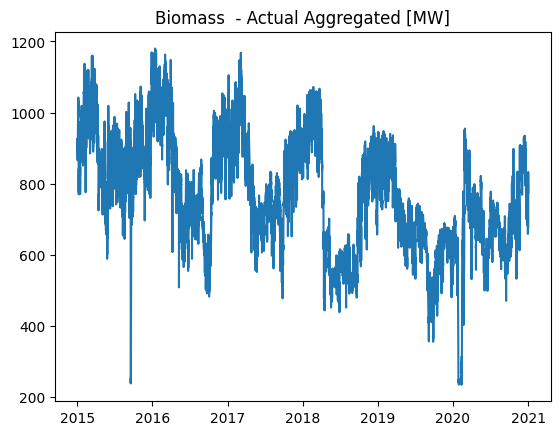

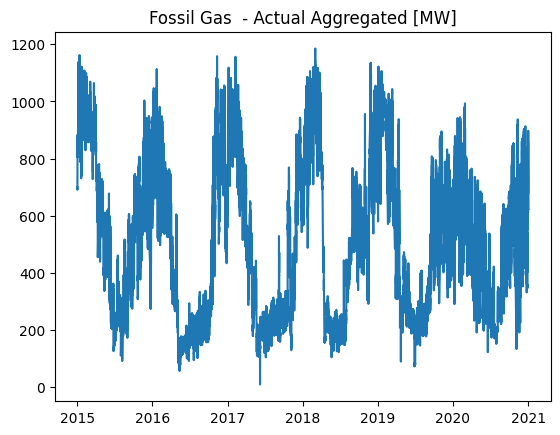

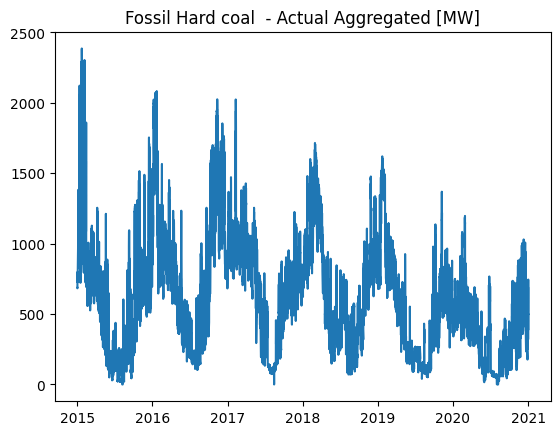

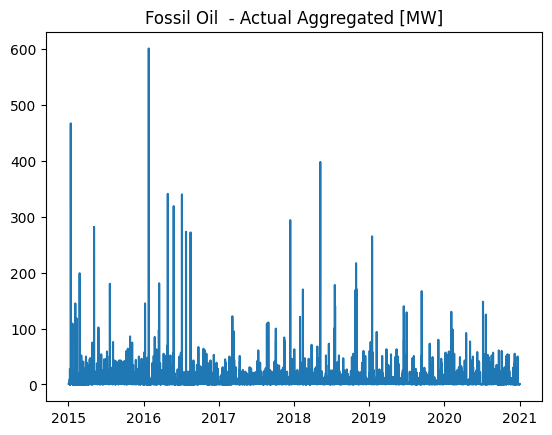

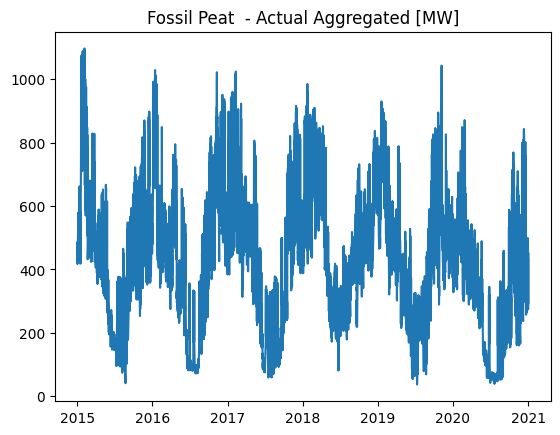

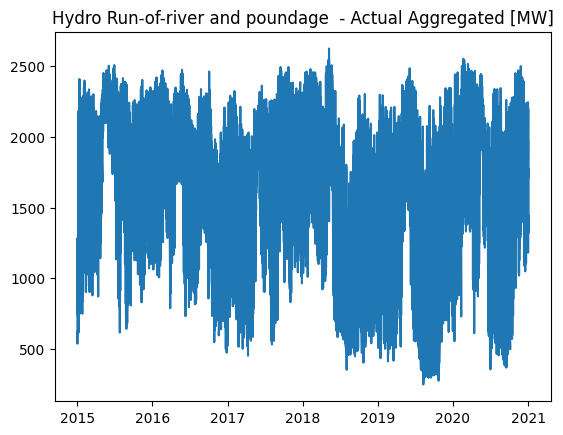

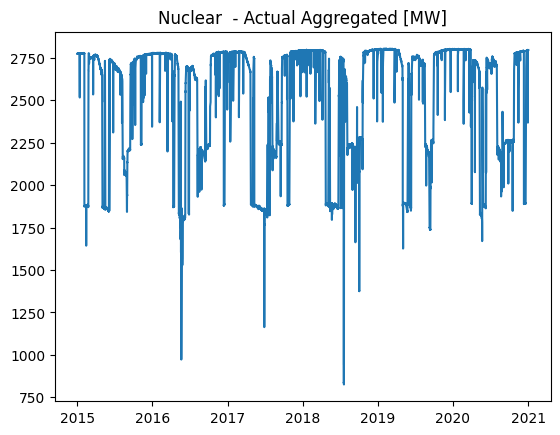

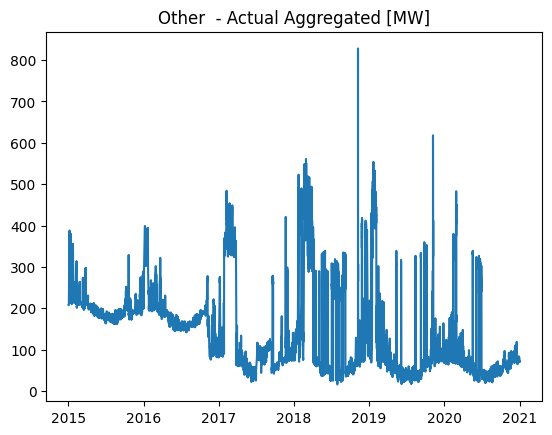

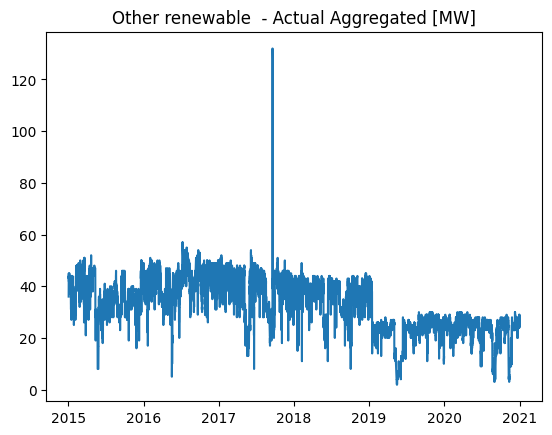

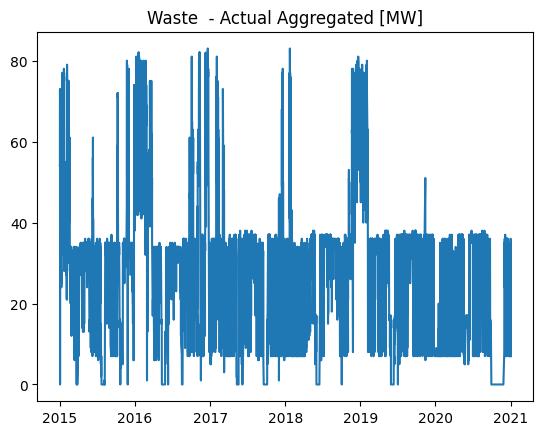

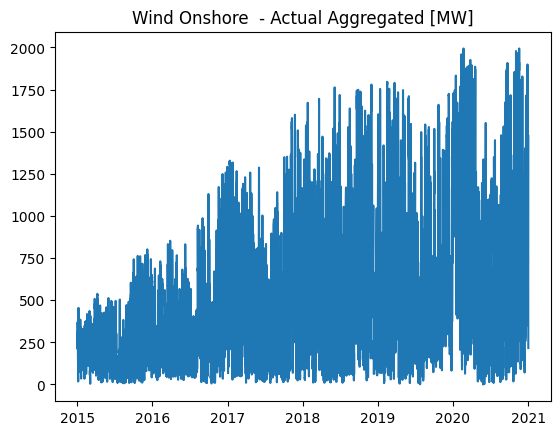

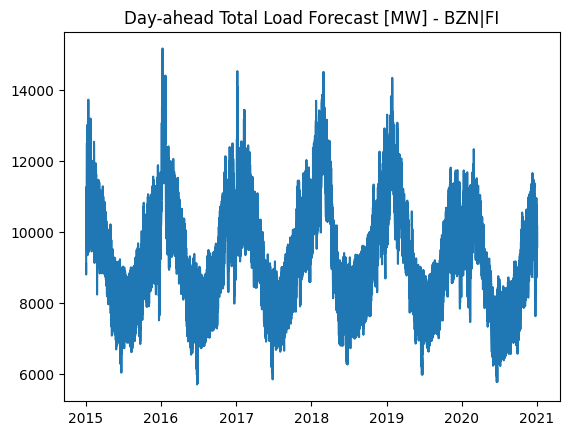

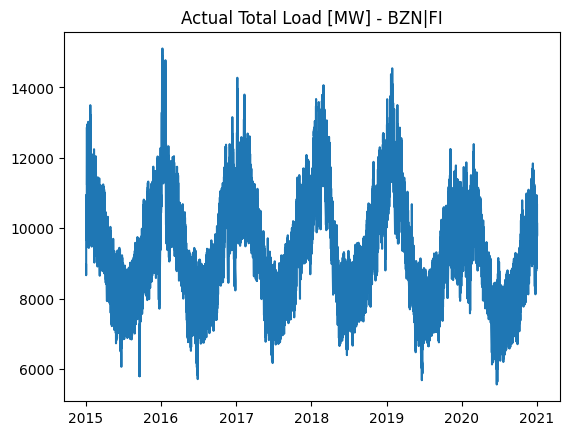

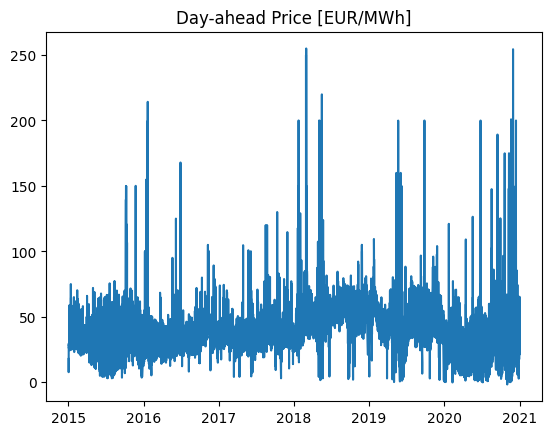

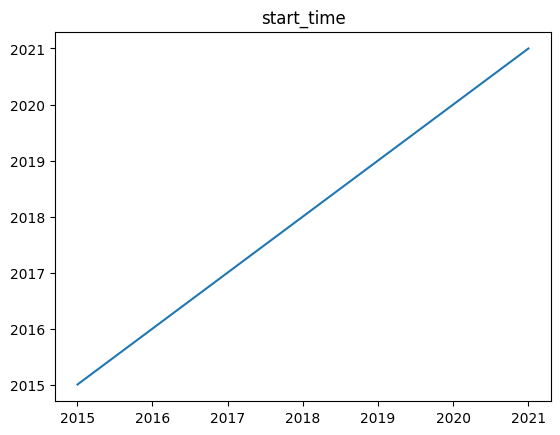

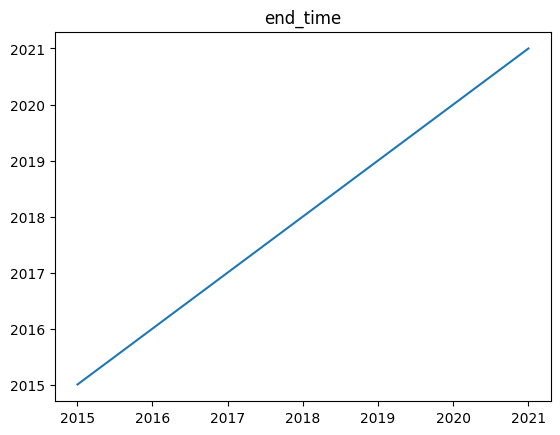

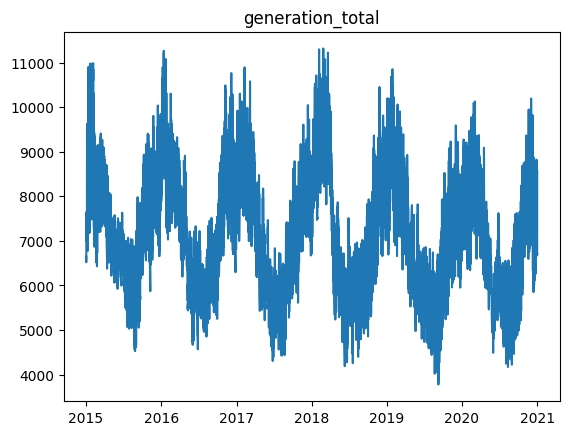

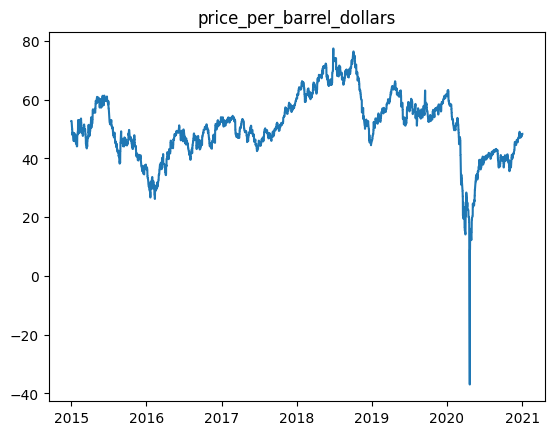

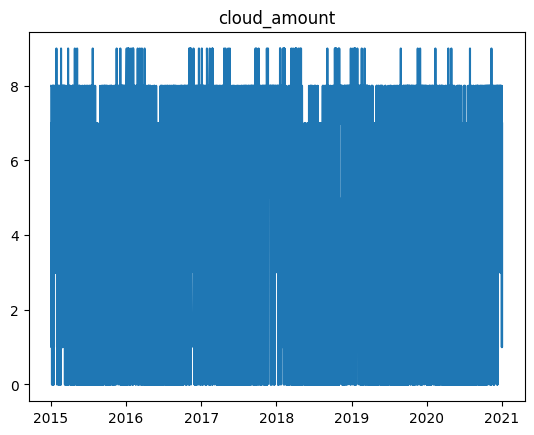

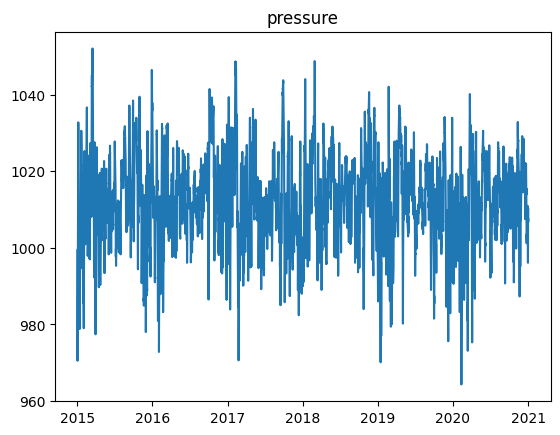

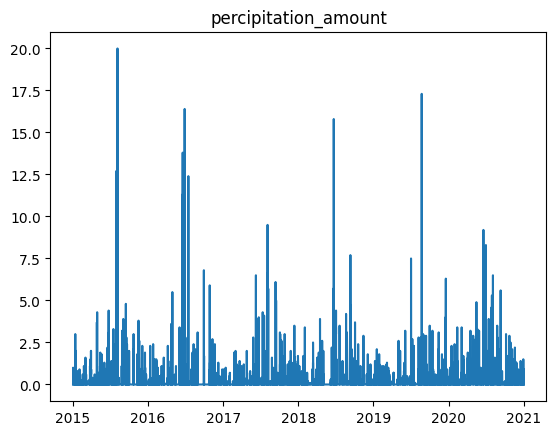

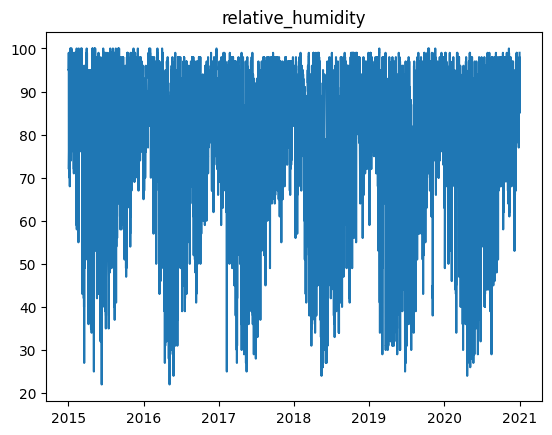

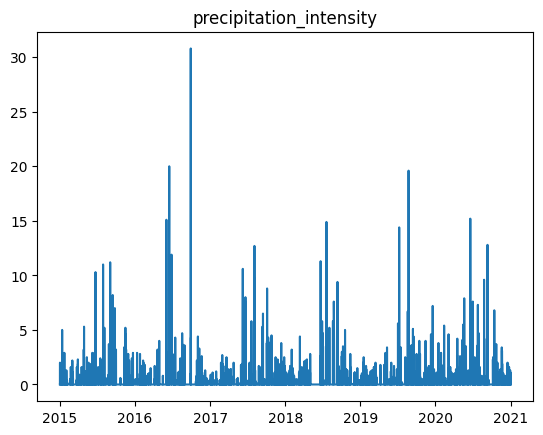

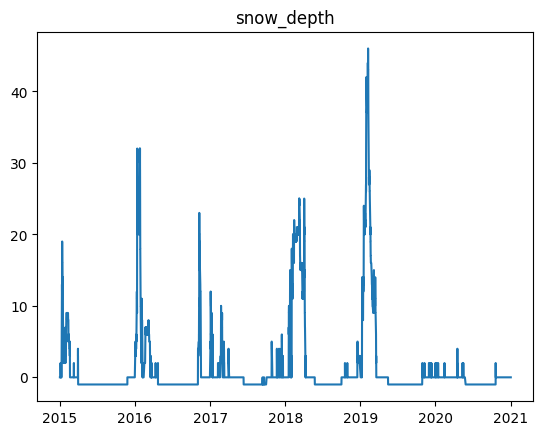

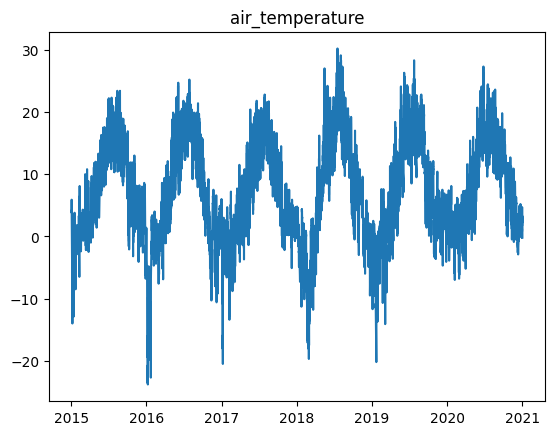

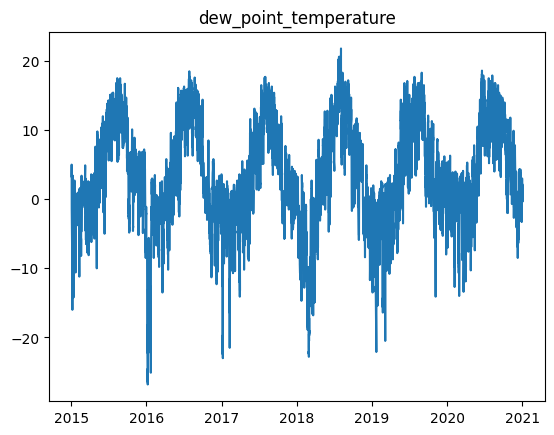

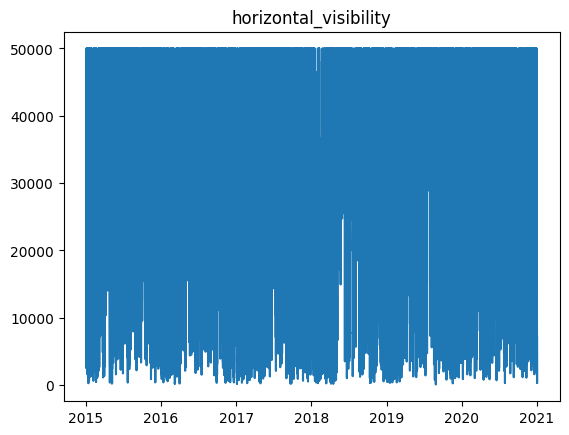

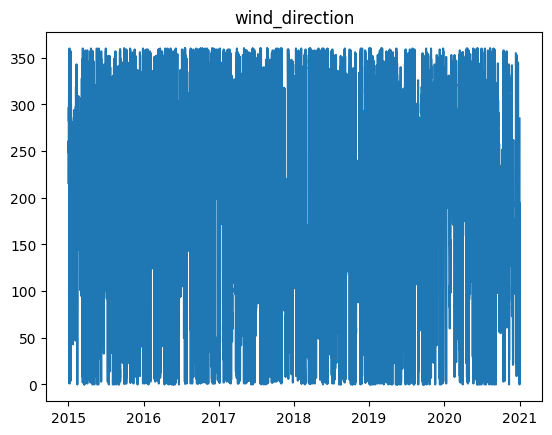

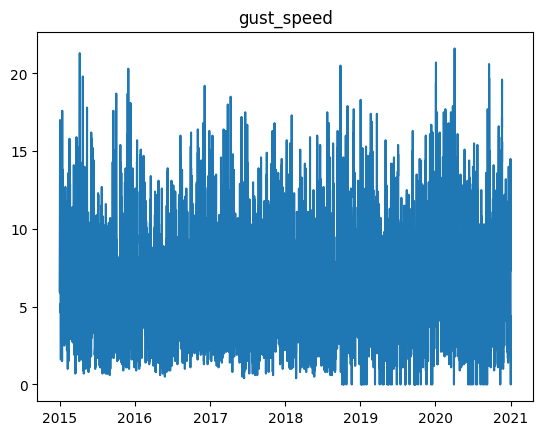

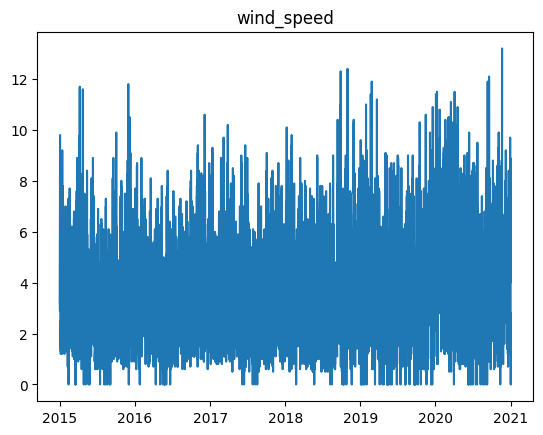

In [63]:
import matplotlib.pyplot as plt

for column in df_all.columns:
    plt.plot(df_all['start_time'], df_all[column])
    plt.title(column)
    plt.show()

## Drop missing values

In [58]:
df_all.dropna(inplace = True)

In [59]:
len(df_all)

36040

## Find outliers

In [51]:
df = df_all.drop(['start_time', 'end_time'], axis = 1)

In [52]:

import numpy as np
from scipy import stats
df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

,Biomass - Actual Aggregated [MW],Fossil Gas - Actual Aggregated [MW],Fossil Hard coal - Actual Aggregated [MW],Fossil Oil - Actual Aggregated [MW],Fossil Peat - Actual Aggregated [MW],Hydro Run-of-river and poundage - Actual Aggregated [MW],Nuclear - Actual Aggregated [MW],Other - Actual Aggregated [MW],Other renewable - Actual Aggregated [MW],Waste - Actual Aggregated [MW],...,percipitation_amount,relative_humidity,precipitation_intensity,snow_depth,air_temperature,dew_point_temperature,horizontal_visibility,wind_direction,gust_speed,wind_speed


## Find where generation total == 0

In [64]:
df_all.loc[df_all.generation_total == 0]

,Biomass - Actual Aggregated [MW],Fossil Gas - Actual Aggregated [MW],Fossil Hard coal - Actual Aggregated [MW],Fossil Oil - Actual Aggregated [MW],Fossil Peat - Actual Aggregated [MW],Hydro Run-of-river and poundage - Actual Aggregated [MW],Nuclear - Actual Aggregated [MW],Other - Actual Aggregated [MW],Other renewable - Actual Aggregated [MW],Waste - Actual Aggregated [MW],...,percipitation_amount,relative_humidity,precipitation_intensity,snow_depth,air_temperature,dew_point_temperature,horizontal_visibility,wind_direction,gust_speed,wind_speed


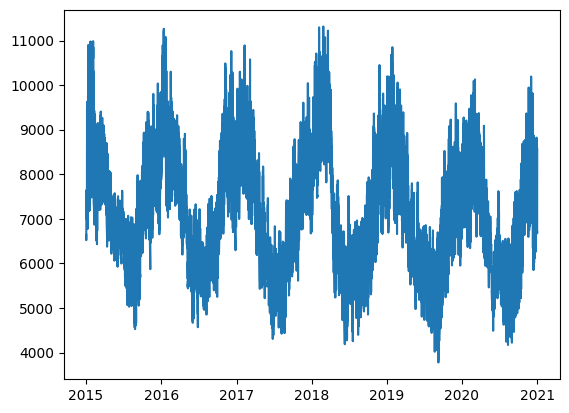

In [65]:
import matplotlib.pyplot as plt

plt.plot(df_all['start_time'], df_all['generation_total'])

The total generation was 0 due to missing values.

In [67]:
df_all.to_csv('./data/full_dataset.csv')

In [54]:
df.head()

,Biomass - Actual Aggregated [MW],Fossil Gas - Actual Aggregated [MW],Fossil Hard coal - Actual Aggregated [MW],Fossil Oil - Actual Aggregated [MW],Fossil Peat - Actual Aggregated [MW],Hydro Run-of-river and poundage - Actual Aggregated [MW],Nuclear - Actual Aggregated [MW],Other - Actual Aggregated [MW],Other renewable - Actual Aggregated [MW],Waste - Actual Aggregated [MW],...,percipitation_amount,relative_humidity,precipitation_intensity,snow_depth,air_temperature,dew_point_temperature,horizontal_visibility,wind_direction,gust_speed,wind_speed
0,881.0,700.0,686.0,1.0,428.0,622.0,2773.0,208.0,36.0,54.0,...,0.0,95.0,0.0,0.0,4.1,3.3,37770.0,249.0,6.0,3.2
1,881.0,700.0,686.0,1.0,428.0,622.0,2773.0,208.0,36.0,54.0,...,0.0,95.0,0.0,0.0,4.1,3.3,37770.0,249.0,6.0,3.2
2,884.0,696.0,684.0,1.0,422.0,583.0,2773.0,208.0,40.0,54.0,...,0.0,95.0,0.0,0.0,4.3,3.6,29510.0,254.0,6.4,3.5
3,897.0,691.0,683.0,1.0,422.0,538.0,2774.0,208.0,40.0,54.0,...,0.0,96.0,0.0,0.0,4.2,3.5,26980.0,261.0,6.4,3.6
4,898.0,696.0,687.0,1.0,417.0,545.0,2774.0,208.0,38.0,54.0,...,0.0,96.0,0.0,0.0,4.2,3.6,19950.0,253.0,5.9,3.3
